# Podcast Recommander System

## Table of Contents

- Dependancies and Dataset

- Data Cleaning

- Data Exploration

-----------
Popularity Based Recommendation

Data Preprocessing

Machine Learning Modelling and Output

# Dependancies and Dataset

## Importing Dependancies

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
data = pd.read_csv('metadata.csv')

data.head(5)

,show_uri,show_name,show_description,publisher,language,rss_link,episode_uri,episode_name,episode_description,duration,show_filename_prefix,episode_filename_prefix
0,spotify:show:2NYtxEZyYelR6RMKmjfPLB,Kream in your Koffee,A 20-something blunt female takes on the world...,Katie Houle,['en'],https://anchor.fm/s/11b84b68/podcast/rss,spotify:episode:000A9sRBYdVh66csG2qEdj,1: It’s Christmas Time!,On the first ever episode of Kream in your Kof...,12.700133,show_2NYtxEZyYelR6RMKmjfPLB,000A9sRBYdVh66csG2qEdj
1,spotify:show:15iWCbU7QoO23EndPEO6aN,Morning Cup Of Murder,Ever wonder what murder took place on today in...,Morning Cup Of Murder,['en'],https://anchor.fm/s/b07181c/podcast/rss,spotify:episode:000HP8n3hNIfglT2wSI2cA,The Goleta Postal Facility shootings- January ...,"See something, say something. It’s a mantra ma...",6.019383,show_15iWCbU7QoO23EndPEO6aN,000HP8n3hNIfglT2wSI2cA
2,spotify:show:6vZRgUFTYwbAA79UNCADr4,Inside The 18 : A Podcast for Goalkeepers by G...,Inside the 18 is your source for all things Go...,Inside the 18 GK Media,['en'],https://anchor.fm/s/81a072c/podcast/rss,spotify:episode:001UfOruzkA3Bn1SPjcdfa,Ep.36 - Incorporating a Singular Goalkeeping C...,Today’s episode is a sit down Michael and Omar...,43.616333,show_6vZRgUFTYwbAA79UNCADr4,001UfOruzkA3Bn1SPjcdfa
3,spotify:show:5BvKEjaMSuvUsGROGi2S7s,Arrowhead Live!,Your favorite podcast for everything @Chiefs! ...,Arrowhead Live!,['en-US'],https://anchor.fm/s/917dba4/podcast/rss,spotify:episode:001i89SvIQgDuuyC53hfBm,Episode 1: Arrowhead Live! Debut,Join us as we take a look at all current Chief...,58.189200,show_5BvKEjaMSuvUsGROGi2S7s,001i89SvIQgDuuyC53hfBm
4,spotify:show:7w3h3umpH74veEJcbE6xf4,FBoL,"The comedy podcast about toxic characters, wri...",Emily Edwards,['en'],https://www.fuckboisoflit.com/episodes?format=rss,spotify:episode:0025RWNwe2lnp6HcnfzwzG,"The Lion, The Witch, And The Wardrobe - Ashley...",The modern morality tail of how to stay good f...,51.782050,show_7w3h3umpH74veEJcbE6xf4,0025RWNwe2lnp6HcnfzwzG


## Data Cleaning

### Checking Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105360 entries, 0 to 105359
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   show_uri                 105360 non-null  object 
 1   show_name                105360 non-null  object 
 2   show_description         105358 non-null  object 
 3   publisher                105360 non-null  object 
 4   language                 105360 non-null  object 
 5   rss_link                 105360 non-null  object 
 6   episode_uri              105360 non-null  object 
 7   episode_name             105360 non-null  object 
 8   episode_description      105155 non-null  object 
 9   duration                 105360 non-null  float64
 10  show_filename_prefix     105360 non-null  object 
 11  episode_filename_prefix  105360 non-null  object 
dtypes: float64(1), object(11)
memory usage: 9.6+ MB


In [4]:
df = data.copy()

In [5]:
# Check for missing values
df.isnull().sum()

show_uri                     0
show_name                    0
show_description             2
publisher                    0
language                     0
rss_link                     0
episode_uri                  0
episode_name                 0
episode_description        205
duration                     0
show_filename_prefix         0
episode_filename_prefix      0
dtype: int64

In [6]:
# Fill missing values
df['show_description'].fillna("No description available", inplace=True)
df['episode_description'].fillna("No description available", inplace=True)

In [7]:
# df.isnull().sum()

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.head()

,show_uri,show_name,show_description,publisher,language,rss_link,episode_uri,episode_name,episode_description,duration,show_filename_prefix,episode_filename_prefix
0,spotify:show:2NYtxEZyYelR6RMKmjfPLB,Kream in your Koffee,A 20-something blunt female takes on the world...,Katie Houle,['en'],https://anchor.fm/s/11b84b68/podcast/rss,spotify:episode:000A9sRBYdVh66csG2qEdj,1: It’s Christmas Time!,On the first ever episode of Kream in your Kof...,12.700133,show_2NYtxEZyYelR6RMKmjfPLB,000A9sRBYdVh66csG2qEdj
1,spotify:show:15iWCbU7QoO23EndPEO6aN,Morning Cup Of Murder,Ever wonder what murder took place on today in...,Morning Cup Of Murder,['en'],https://anchor.fm/s/b07181c/podcast/rss,spotify:episode:000HP8n3hNIfglT2wSI2cA,The Goleta Postal Facility shootings- January ...,"See something, say something. It’s a mantra ma...",6.019383,show_15iWCbU7QoO23EndPEO6aN,000HP8n3hNIfglT2wSI2cA
2,spotify:show:6vZRgUFTYwbAA79UNCADr4,Inside The 18 : A Podcast for Goalkeepers by G...,Inside the 18 is your source for all things Go...,Inside the 18 GK Media,['en'],https://anchor.fm/s/81a072c/podcast/rss,spotify:episode:001UfOruzkA3Bn1SPjcdfa,Ep.36 - Incorporating a Singular Goalkeeping C...,Today’s episode is a sit down Michael and Omar...,43.616333,show_6vZRgUFTYwbAA79UNCADr4,001UfOruzkA3Bn1SPjcdfa
3,spotify:show:5BvKEjaMSuvUsGROGi2S7s,Arrowhead Live!,Your favorite podcast for everything @Chiefs! ...,Arrowhead Live!,['en-US'],https://anchor.fm/s/917dba4/podcast/rss,spotify:episode:001i89SvIQgDuuyC53hfBm,Episode 1: Arrowhead Live! Debut,Join us as we take a look at all current Chief...,58.189200,show_5BvKEjaMSuvUsGROGi2S7s,001i89SvIQgDuuyC53hfBm
4,spotify:show:7w3h3umpH74veEJcbE6xf4,FBoL,"The comedy podcast about toxic characters, wri...",Emily Edwards,['en'],https://www.fuckboisoflit.com/episodes?format=rss,spotify:episode:0025RWNwe2lnp6HcnfzwzG,"The Lion, The Witch, And The Wardrobe - Ashley...",The modern morality tail of how to stay good f...,51.782050,show_7w3h3umpH74veEJcbE6xf4,0025RWNwe2lnp6HcnfzwzG


In [10]:
## Creating a seperate dataframe from the existing dataframe.

df_new = df[['show_name','show_description','publisher','language','episode_name','episode_description','duration']] 

In [11]:
df_new.head(10)

,show_name,show_description,publisher,language,episode_name,episode_description,duration
0,Kream in your Koffee,A 20-something blunt female takes on the world...,Katie Houle,['en'],1: It’s Christmas Time!,On the first ever episode of Kream in your Kof...,12.700133
1,Morning Cup Of Murder,Ever wonder what murder took place on today in...,Morning Cup Of Murder,['en'],The Goleta Postal Facility shootings- January ...,"See something, say something. It’s a mantra ma...",6.019383
2,Inside The 18 : A Podcast for Goalkeepers by G...,Inside the 18 is your source for all things Go...,Inside the 18 GK Media,['en'],Ep.36 - Incorporating a Singular Goalkeeping C...,Today’s episode is a sit down Michael and Omar...,43.616333
3,Arrowhead Live!,Your favorite podcast for everything @Chiefs! ...,Arrowhead Live!,['en-US'],Episode 1: Arrowhead Live! Debut,Join us as we take a look at all current Chief...,58.189200
4,FBoL,"The comedy podcast about toxic characters, wri...",Emily Edwards,['en'],"The Lion, The Witch, And The Wardrobe - Ashley...",The modern morality tail of how to stay good f...,51.782050
5,UPSC Podcasts,Podcasts useful for UPSC aspirants! Mainly dis...,UPSC Podcast,['en'],Tourism in India : Opportunities and Challenges,.,13.788000
6,The Feminization Boudoir,Enter the world of dominant women and submissi...,Kylie Gable,['en'],The Sissy's Mentor (Part 5),Miss Jenn Davis reads the final part of The Si...,30.589200
7,Chastity and The City,"We are four, 30 somethings living in a city sh...",Chastity,['en'],Our Journey with Chastity,In today's episode of Chasity and the City we ...,39.437133
8,They Had to Go Out,Get ready to whiten those knuckles and hold fa...,They Had to Go Out,['en'],Episode 50: Dan Shirey - BM - Surfman - 44 MLB...,Former Boatswain’s Mate Dan Shirey talks pitch...,58.469783
9,The Good Sign,Let’s be real and honest! Life can be challeng...,Donna Simantov,['en'],Talia and me part 2!,Join us as we learn the tricks and tips of sta...,31.074483


In [12]:
# Descriptive Analysis

df_new.duration.describe()

count    105360.000000
mean         33.845715
std          22.735674
min           0.175317
25%          13.552638
50%          31.643375
75%          50.446825
max         304.953900
Name: duration, dtype: float64

In [13]:
# Select rows with duration less than 10
duration_less_than_5 = df[df['duration'] < 5]

# Print the summary statistics for the selected rows
print(duration_less_than_5.describe())
# duration_less_than_10.head()

          duration
count  9611.000000
mean      2.896301
std       1.185449
min       0.175317
25%       1.991850
50%       2.969050
75%       3.829767
max       4.999650


In [14]:
# episodes.drop(episodes[episodes["audio_length"] < 1].index, inplace = True)
df_new.drop(df_new[df_new['duration']<5].index,inplace = True)


In [48]:
# df_new.describe()

# Data Cleaning

In [16]:
def cleaning(data, column):
    df = data.copy()
    df[column] = df[column].str.lower()
    
    # fastest source of contractions I could find: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
    contractions = { 
    "ain't": "are not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
    
#   cleaning the text for the contractions
    for k, v in contractions.items():
        df[column] = df[column].str.replace(k.lower(), v.lower())
        
#   making a list of the neutral characters to delete in the text
    special_characters={
    "-": " ",
    "\'": " ",
    "\"": " ",
    ",": " ",
    "$": " ",
    "%": " ",
    "[": " ",
    "]": " ",
    ".": " ",
    "/": " ",
    "?": " ? "
    }
    
#   cleaning the data with the special characters
    for k, v in special_characters.items():
        df[column] = df[column].str.replace(k,v)
        
#   replacing multiple spaces with a single space
    for s in range(1, 8):
        df[column] = df[column].str.replace(" "*s, " ")

#   attempting to strip the HTML code in descriptions
    for i, string in enumerate(df[column]):
        try:
            string = re.sub(r"<[^>]*>", "", string)
            df[column][i] = string

        except:
            pass
        
    # making a column for any left over/missed descriptions with HTML code 
    df["html_uncleaned"] = df[column].str.contains("</")
    # drop the episodes that still have HTML (there should not be contextual information on the episode)
    drop_it = df[df["html_uncleaned"] == 1].index
    df = df.drop(drop_it)
    df = df.drop(columns="html_uncleaned")

    # fill all NAN object cells with empty string
    df = df.fillna("")
    # drop the episodes with no text information (there is no ability to save the data)
    drop_it = df[df[column] == ""].index
    df = df.drop(drop_it)

    # reset the index and drop the original & return
    return df.reset_index(drop=True)

In [18]:
#Cleaning Column show description
df_new = cleaning(df_new,'show_description')

In [19]:
#Cleaning Column episode_description
df_new = cleaning(df_new,'episode_description')

In [21]:
df_new.head()

,show_name,show_description,publisher,language,episode_name,episode_description,duration
0,Kream in your Koffee,a 20 something blunt female takes on the world...,Katie Houle,['en'],1: It’s Christmas Time!,on the first ever episode of kream in your kof...,12.700133
1,Morning Cup Of Murder,ever wonder what murder took place on today in...,Morning Cup Of Murder,['en'],The Goleta Postal Facility shootings- January ...,see something say something it’s a mantra many...,6.019383
2,Inside The 18 : A Podcast for Goalkeepers by G...,inside the 18 is your source for all things go...,Inside the 18 GK Media,['en'],Ep.36 - Incorporating a Singular Goalkeeping C...,today’s episode is a sit down michael and omar...,43.616333
3,Arrowhead Live!,your favorite podcast for everything @chiefs! ...,Arrowhead Live!,['en-US'],Episode 1: Arrowhead Live! Debut,join us as we take a look at all current chief...,58.189200
4,FBoL,the comedy podcast about toxic characters writ...,Emily Edwards,['en'],"The Lion, The Witch, And The Wardrobe - Ashley...",the modern morality tail of how to stay good f...,51.782050


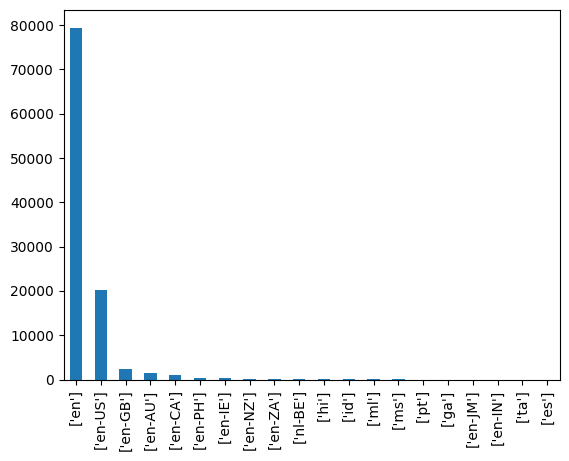

In [22]:
# Categorical Analysis

# Create a bar chart of the number of shows by language
df['language'].value_counts().plot(kind='bar')
plt.show()

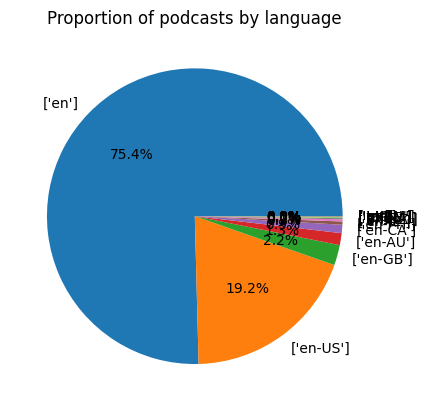

In [23]:
import matplotlib.pyplot as plt

language_counts = df['language'].value_counts()
plt.pie(language_counts.values, labels=language_counts.index, autopct='%1.1f%%')
plt.title('Proportion of podcasts by language')
plt.show()


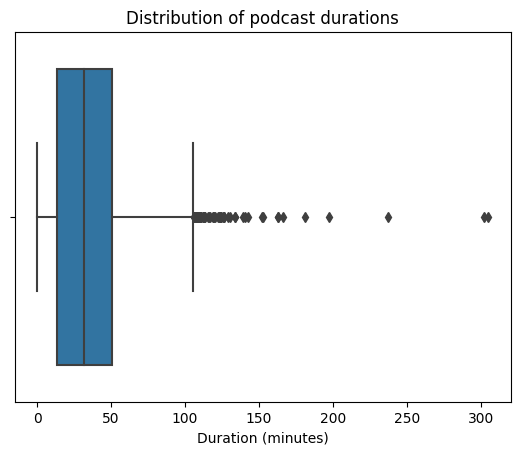

In [24]:
# Box plot of the distribution of podcast durations

sns.boxplot(x=df['duration'])
plt.title('Distribution of podcast durations')
plt.xlabel('Duration (minutes)')
plt.show()


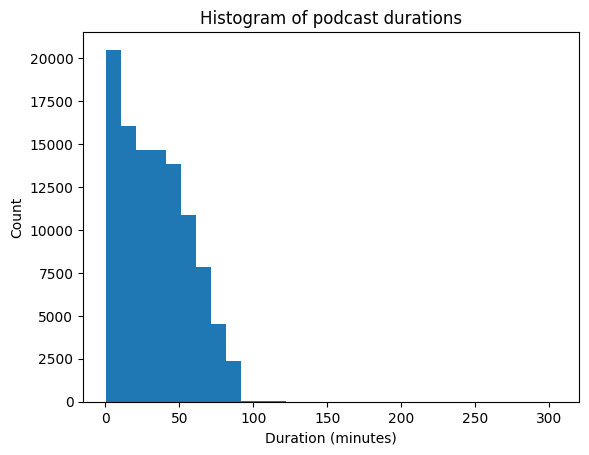

In [25]:
# Histogram of podcast durations:

import matplotlib.pyplot as plt

plt.hist(df['duration'], bins=30)
plt.title('Histogram of podcast durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()


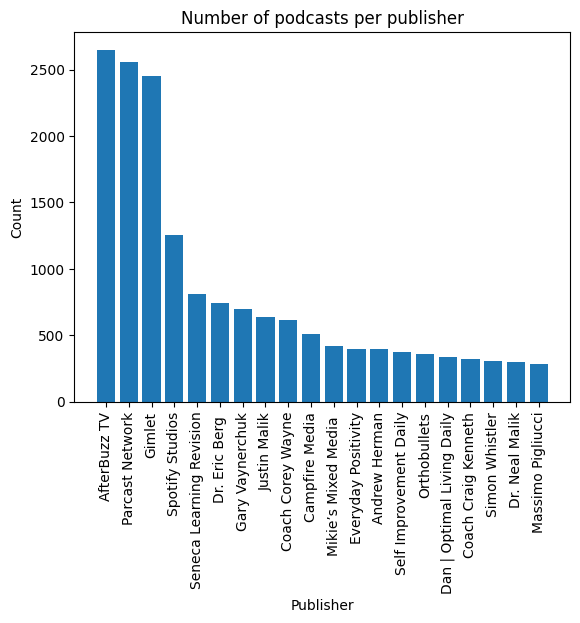

In [27]:
#Bar chart of the number of podcasts per publisher:
import matplotlib.pyplot as plt

publisher_counts = df['publisher'].value_counts().head(20)
plt.bar(publisher_counts.index, publisher_counts.values)
plt.title('Number of podcasts per publisher')
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dhrumil7/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


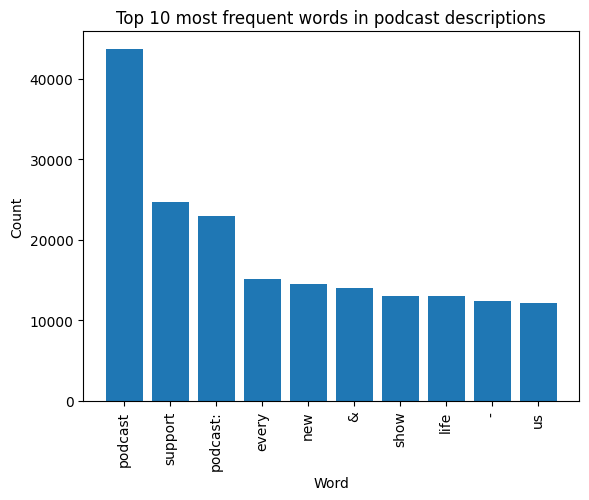

In [28]:
# Bar chart of the top 10 most frequent words in the podcast descriptions

import nltk
from collections import Counter

nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

descriptions = df['show_description'].dropna().str.lower().str.split()
word_counts = Counter(word for desc in descriptions for word in desc if word not in stop_words)
top_words = word_counts.most_common(10)

plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.title('Top 10 most frequent words in podcast descriptions')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


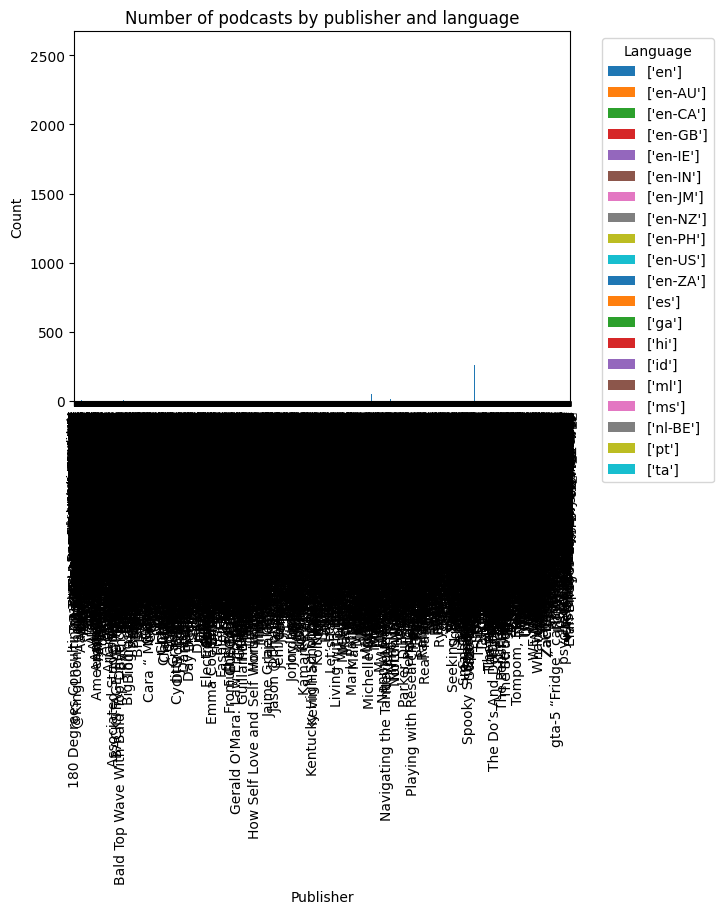

In [30]:
publisher_language_counts = df.groupby(['publisher', 'language']).size().unstack(fill_value=0)

publisher_language_counts.plot(kind='bar')
plt.title('Number of podcasts by publisher and language')
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
